<a href="https://colab.research.google.com/github/Rajsoni03/Visualization_of_Pretrained_Model/blob/main/Model_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import all the necessary libraries

In [34]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from matplotlib import pyplot as plt

# Load Pretrained Model (ResNet50)

In [58]:
pretrained_model = ResNet50(input_shape=(224, 224, 3), weights="imagenet")

In [59]:
# Print the model summary
pretrained_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [60]:
# extracting filter shape and output shape of layers 
for index, layer in enumerate(pretrained_model.layers):
    try:
      # only conv layers returns filters and bias
      filters, bias = layer.get_weights()
      print(f'Layer - {index} \n\t Layer Name - {layer.name}\n\t Filter Shape - {filters.shape}\n\t Output Shape - {layer.output_shape}\n')
    except:
      pass

Layer - 2 
	 Layer Name - conv1_conv
	 Filter Shape - (7, 7, 3, 64)
	 Output Shape - (None, 112, 112, 64)

Layer - 7 
	 Layer Name - conv2_block1_1_conv
	 Filter Shape - (1, 1, 64, 64)
	 Output Shape - (None, 56, 56, 64)

Layer - 10 
	 Layer Name - conv2_block1_2_conv
	 Filter Shape - (3, 3, 64, 64)
	 Output Shape - (None, 56, 56, 64)

Layer - 13 
	 Layer Name - conv2_block1_0_conv
	 Filter Shape - (1, 1, 64, 256)
	 Output Shape - (None, 56, 56, 256)

Layer - 14 
	 Layer Name - conv2_block1_3_conv
	 Filter Shape - (1, 1, 64, 256)
	 Output Shape - (None, 56, 56, 256)

Layer - 19 
	 Layer Name - conv2_block2_1_conv
	 Filter Shape - (1, 1, 256, 64)
	 Output Shape - (None, 56, 56, 64)

Layer - 22 
	 Layer Name - conv2_block2_2_conv
	 Filter Shape - (3, 3, 64, 64)
	 Output Shape - (None, 56, 56, 64)

Layer - 25 
	 Layer Name - conv2_block2_3_conv
	 Filter Shape - (1, 1, 64, 256)
	 Output Shape - (None, 56, 56, 256)

Layer - 29 
	 Layer Name - conv2_block3_1_conv
	 Filter Shape - (1, 1, 256,

# 1. Visualize the filters of a pre-trained model


In [65]:
# function to plot filters using matplotlib
def plot_filters(layer_index, no_of_filters):
  # retrieve weights from the first conv layer
  filters, bias = pretrained_model.layers[layer_index].get_weights()
  # normalize filter values to 0-1
  f_min, f_max = filters.min(), filters.max()
  filters = (filters - f_min) / (f_max - f_min)

  axis_index=1
  fig = plt.figure(figsize=(20,20))
  for i in range(no_of_filters):
      # get the filters
      f = filters[:,:,:,i]
      for j in range(3):
          # subplot for 6 filters and 3 channels
          plt.subplot(no_of_filters,3,axis_index)
          plt.imshow(f[:,:,j] ,cmap='gray')
          axis_index+=1
  plt.show()

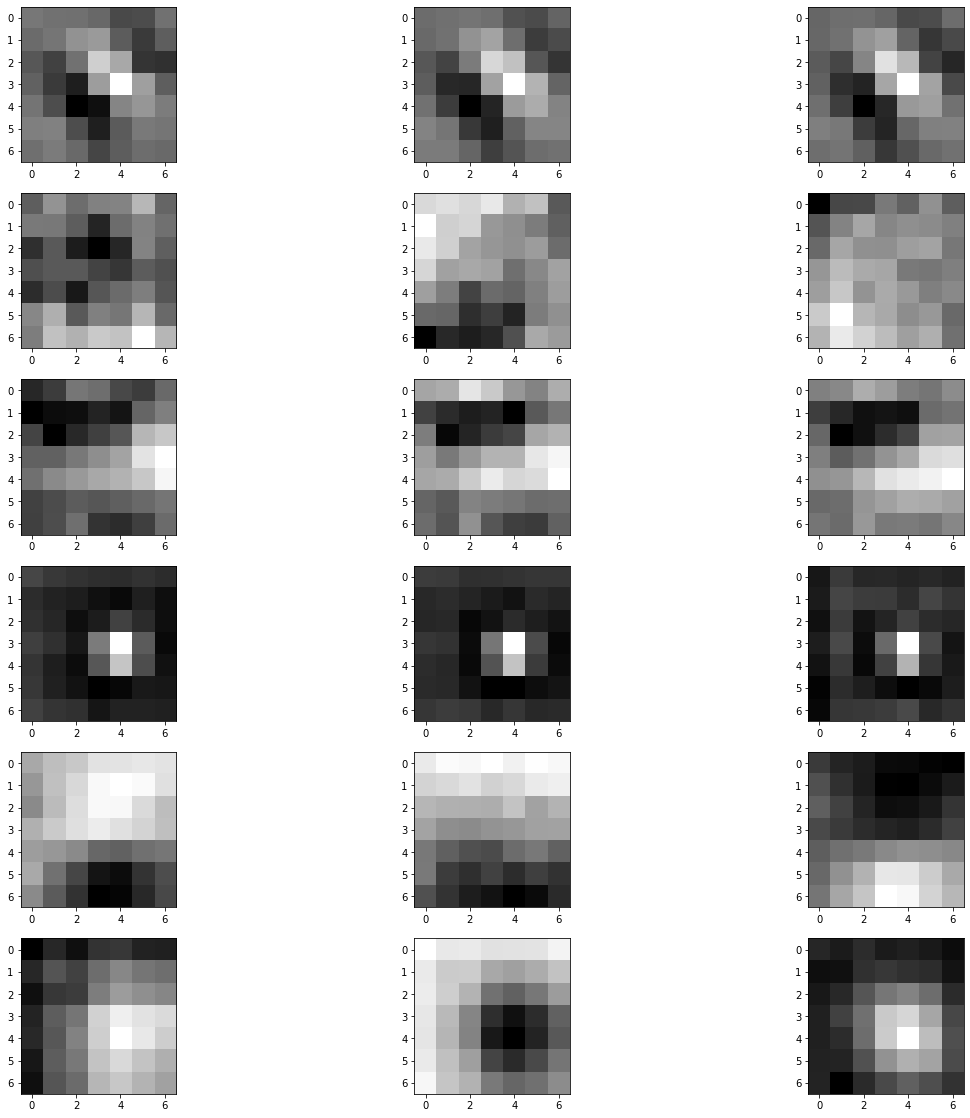

In [66]:
# plot 6 filters for 2nd layers
plot_filters(2, 6)

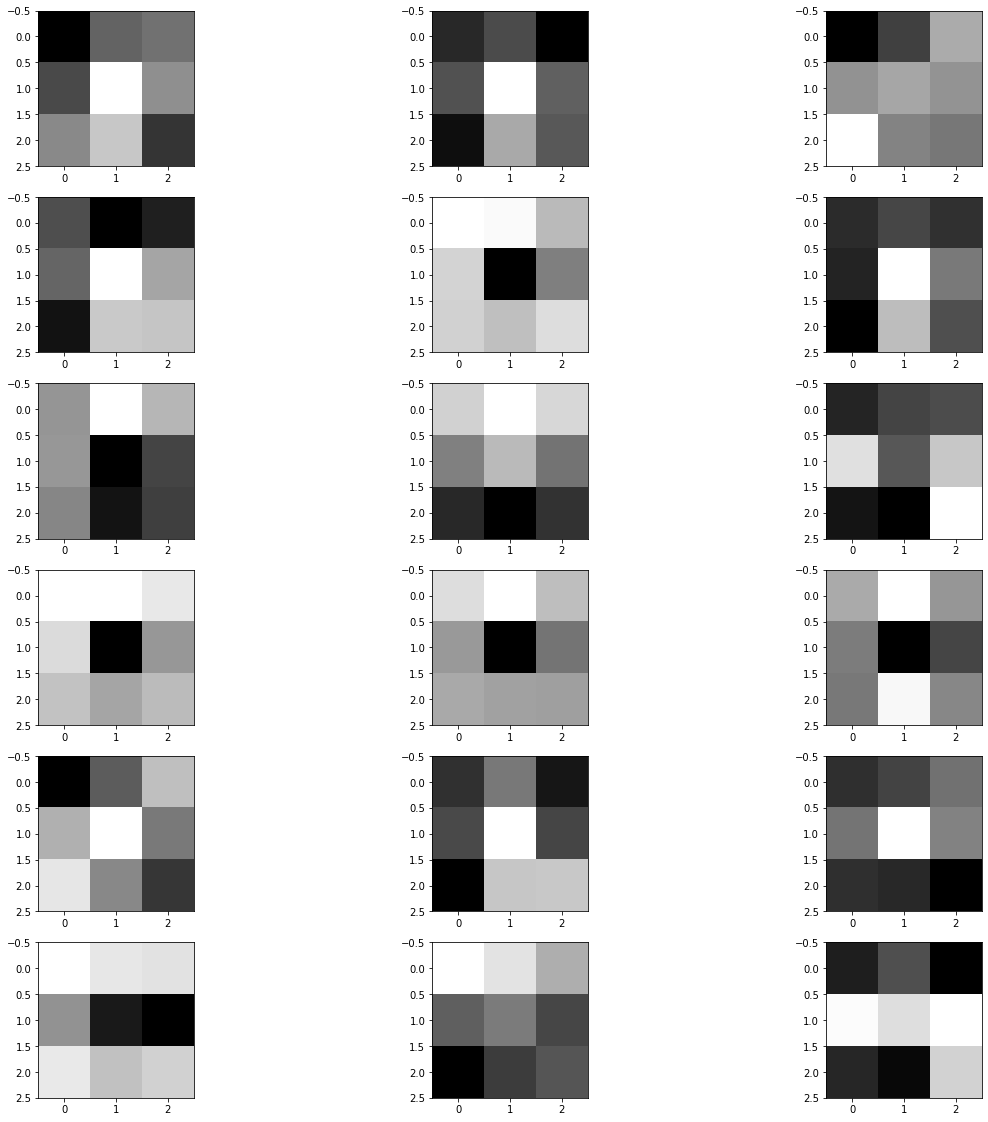

In [67]:
# plot 6 filters for 10th layers
plot_filters(10, 6)

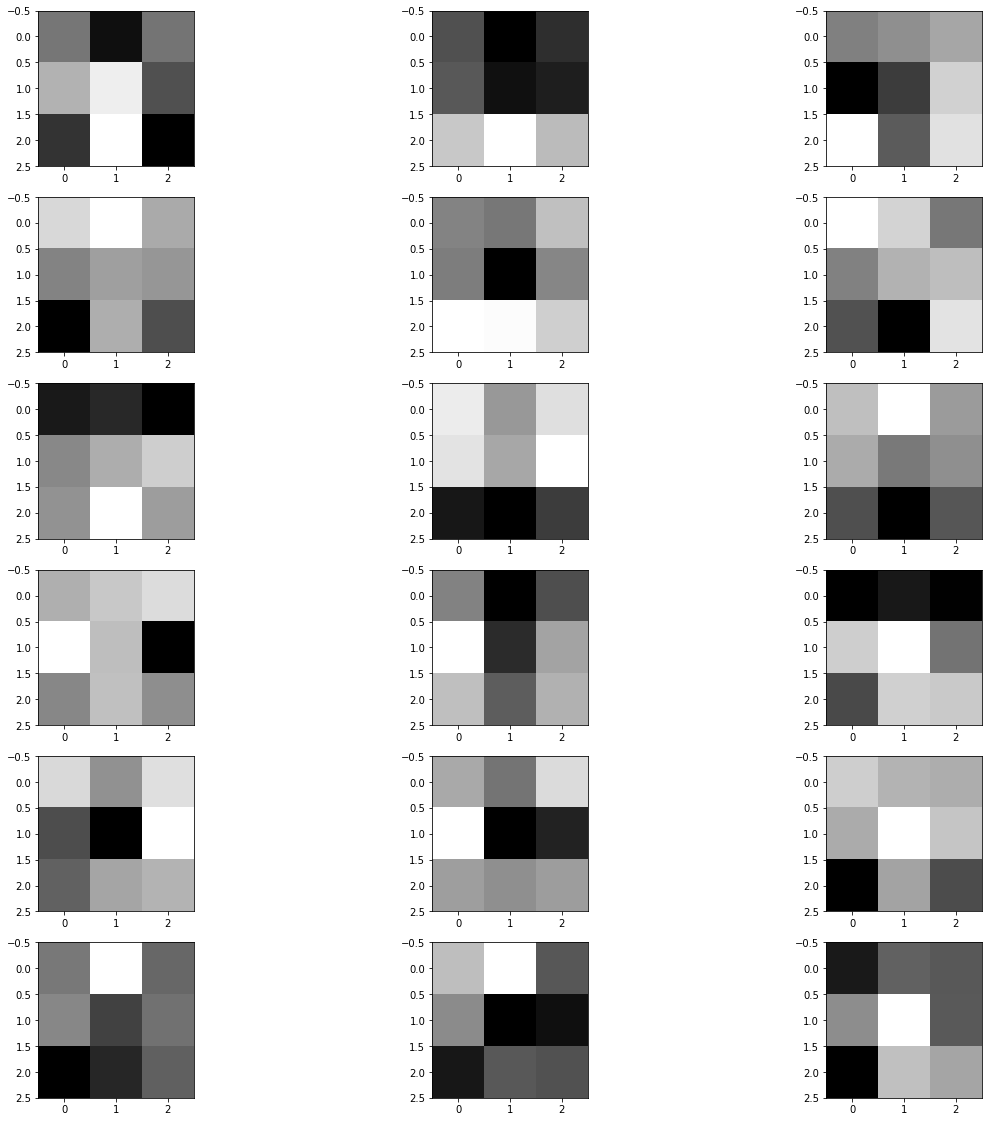

In [69]:
# plot 6 filters for 168th layers
plot_filters(158, 6)

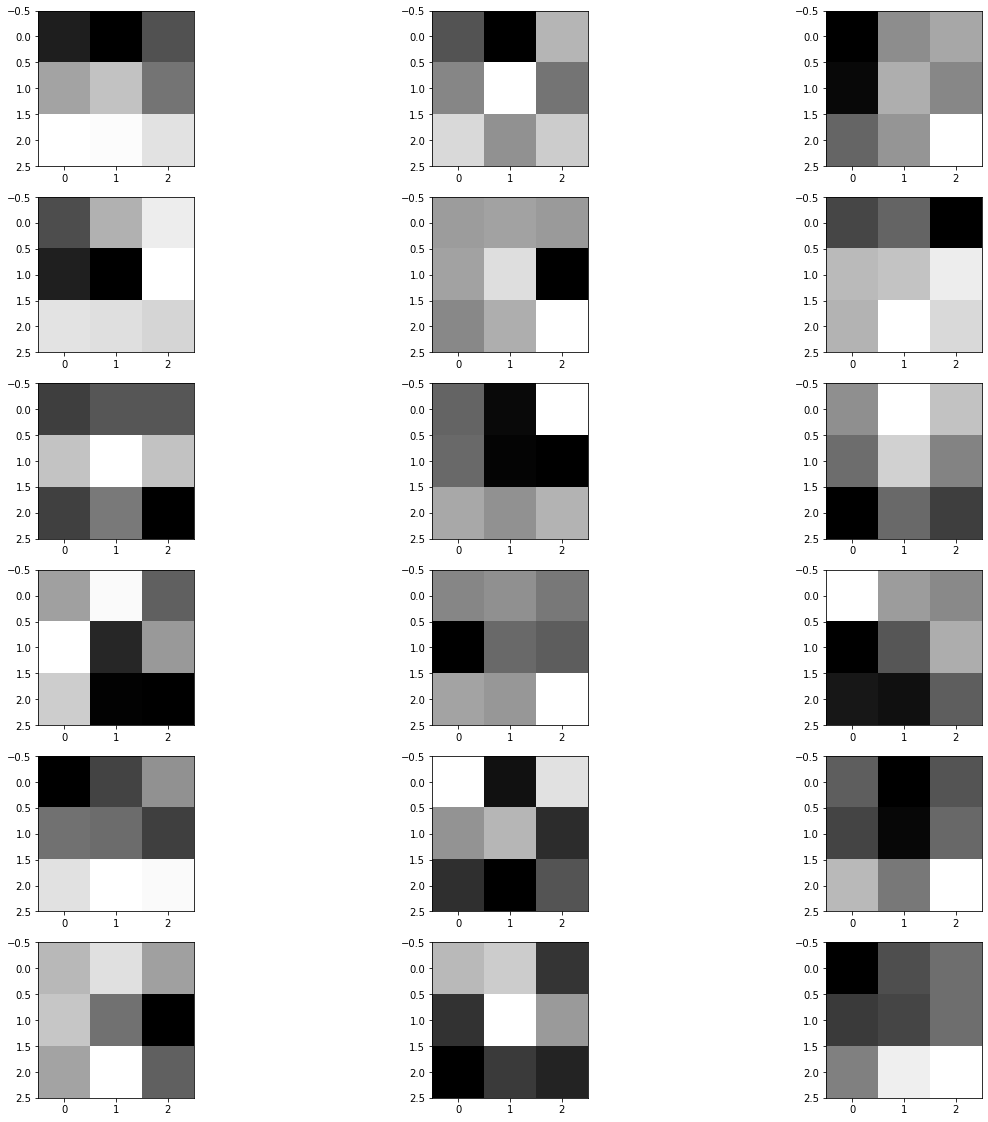

In [70]:
# plot 6 filters for 168th layers
plot_filters(168, 6)

# 2. Explaining DNNs


In [84]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np

In [115]:
# function to plot feature map
def printFeatureMap(image_name, layer_index):
  # load Model 
  model = tf.keras.models.Model(inputs=pretrained_model.inputs , outputs=pretrained_model.layers[layer_index].output)
  # load Image
  image = load_img(image_name, target_size=(224,224))
  # convert the image to an array
  image = img_to_array(image)
  # expand dimensions so that it represents a single 'sample'
  image = np.expand_dims(image, axis=0)

  # calculating features_map
  features = model.predict(image)
  fig = plt.figure(figsize=(20,15))
  for i in range(1,features.shape[3]+1):
      plt.subplot(8,8,i)
      plt.imshow(features[0,:,:,i-1] , cmap='hsv')      
  plt.show()


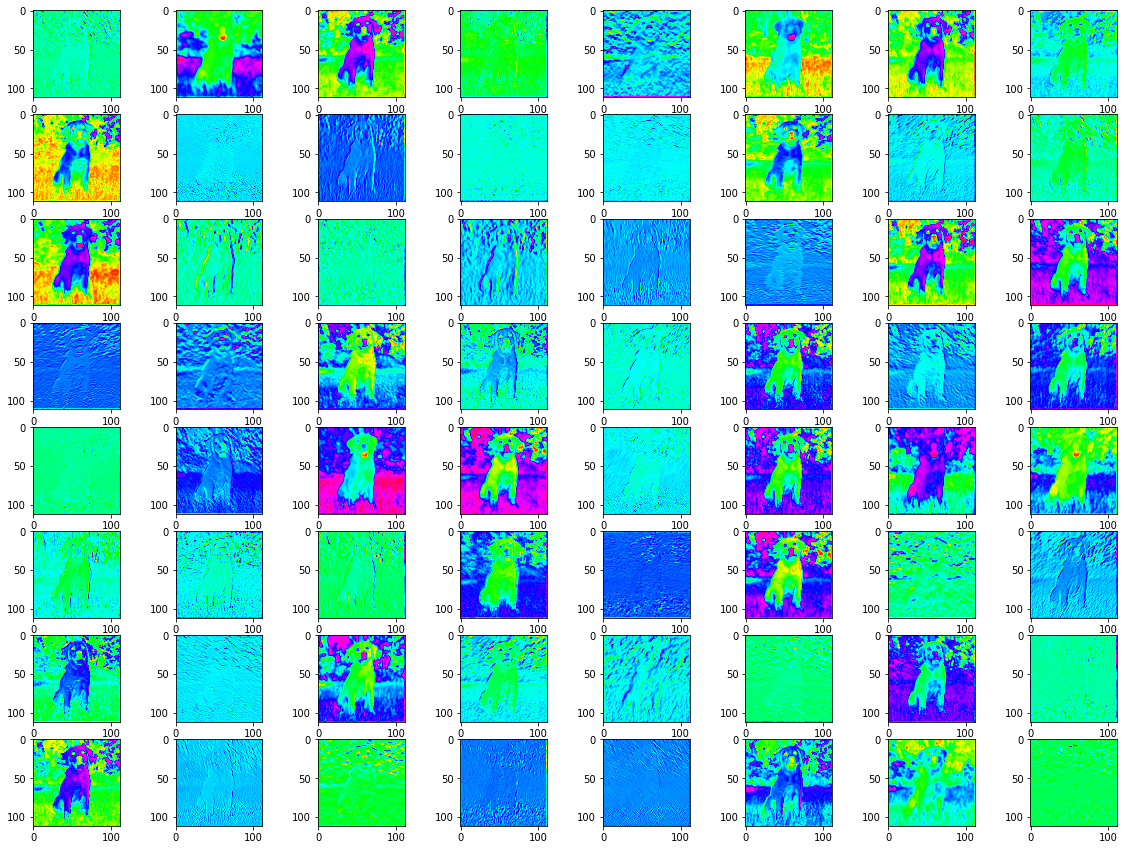

In [116]:
# plot feature map for 2nd layer
printFeatureMap("/content/dog.jpg", 2)

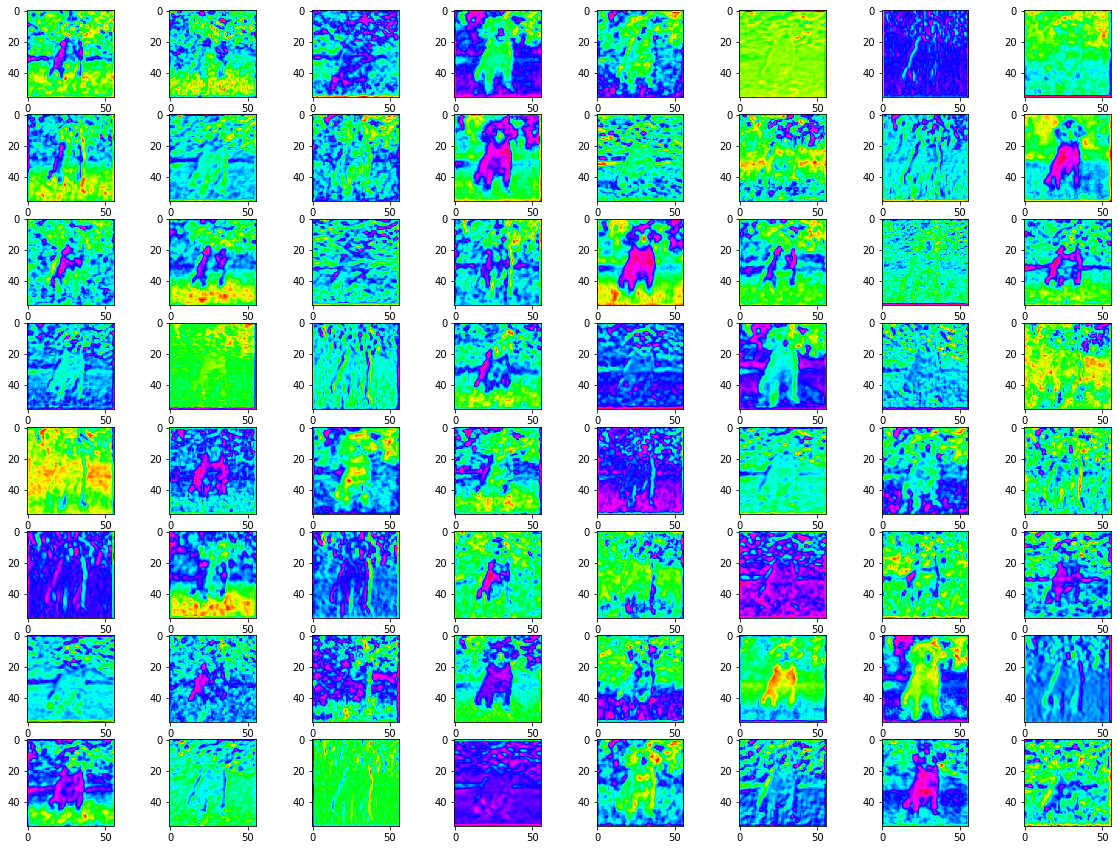

In [117]:
# plot feature map for 10th layer
printFeatureMap("/content/dog.jpg", 10)

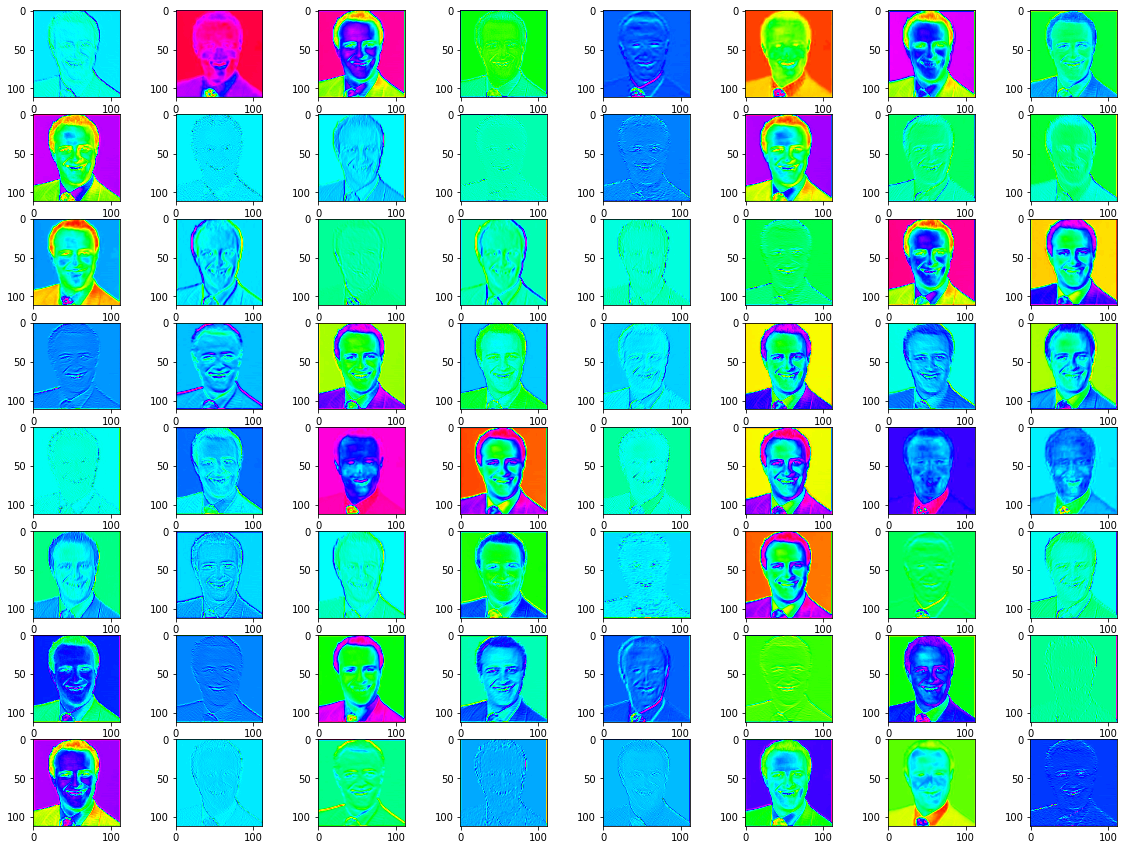

In [118]:
# plot feature map for 2nd layer
printFeatureMap('/content/human.jpg', 2)

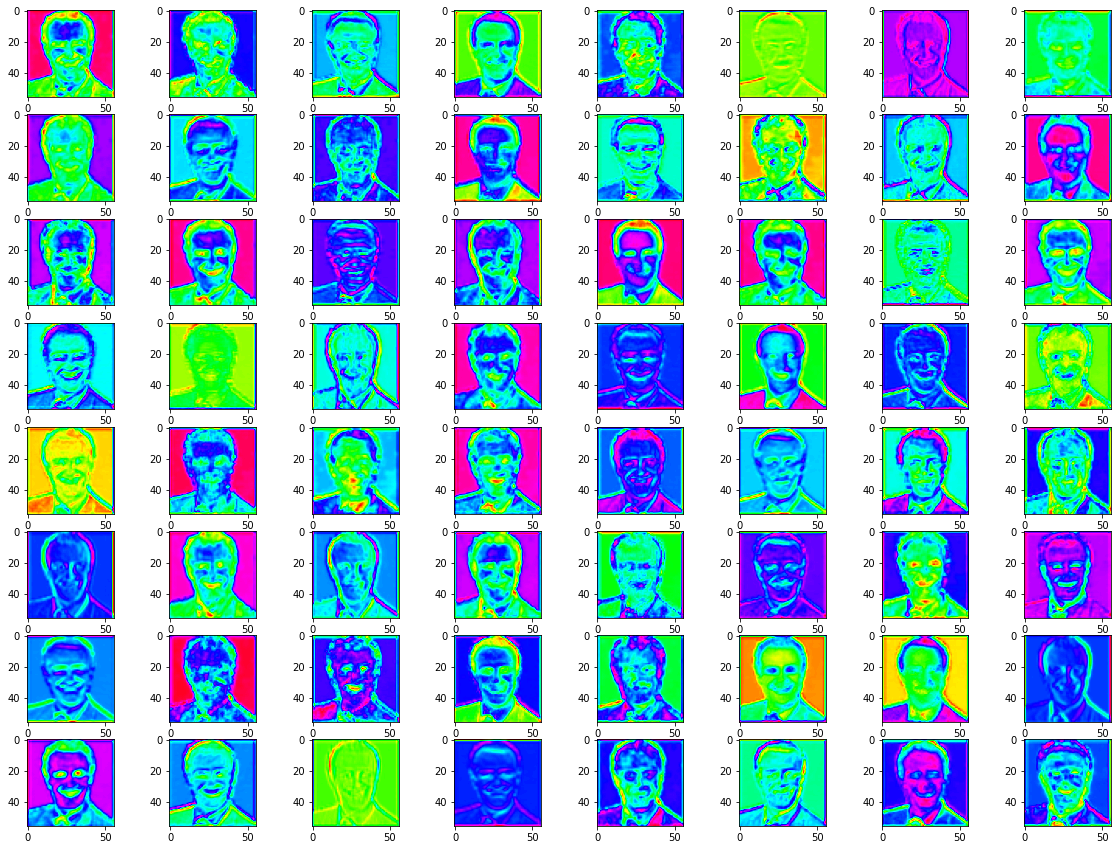

In [119]:
# plot feature map for 10th layer
printFeatureMap('/content/human.jpg', 10)

ValueError: ignored

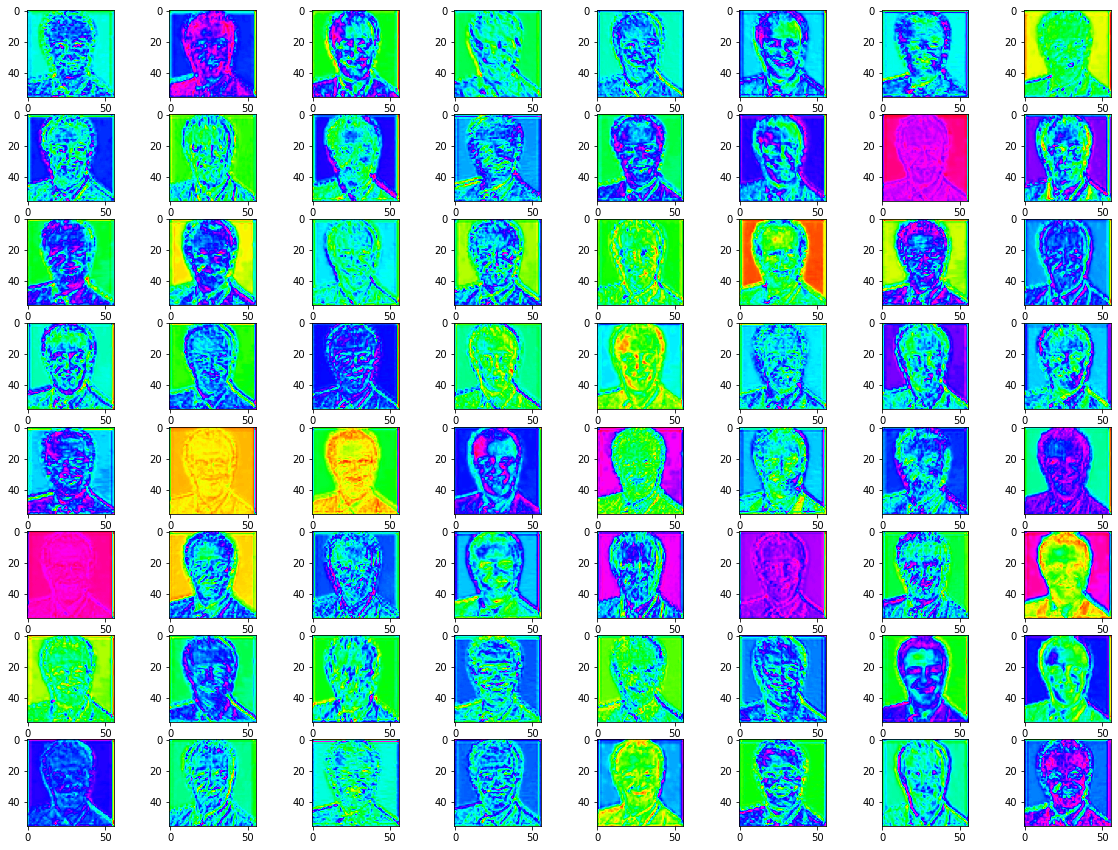

In [120]:
# plot feature map for 10th layer
printFeatureMap('/content/human.jpg', 25)